In [3]:
from google.colab import files
upload = files.upload()

Saving Online Retail.csv to Online Retail.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
on = pd.read_csv('Online Retail.csv')

In [21]:
on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Month_year   406829 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](1)
memory usage: 31.0+ MB


In [18]:
on = on.dropna(axis=0)

In [19]:
on['InvoiceDate']=pd.to_datetime(on['InvoiceDate'])

In [20]:
on['Month_year'] = on['InvoiceDate'].dt.to_period('M')

In [22]:
on.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


## **Quantity**

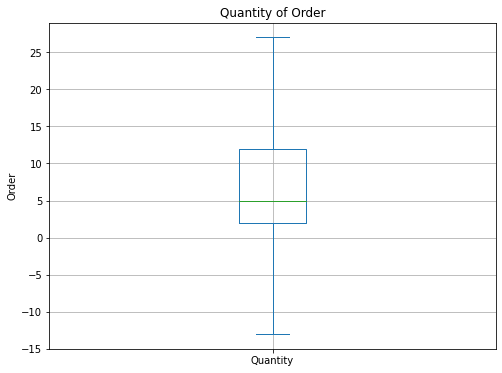

In [23]:
ox = on['Quantity'].plot.box(
    showfliers = False,
    grid = True,
    figsize=(8,6)
)

ox.set_ylabel('Order')
ox.set_title('Quantity of Order')

plt.show()

In [24]:
on['Quantity'].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [25]:
on.loc[on['Quantity'] > 0].shape

(397924, 9)

In [26]:
on.shape

(406829, 9)

In [27]:
on = on.loc[on['Quantity'] > 0]

**Quantity all the time**

In [28]:
month_order = on.set_index('InvoiceDate')['Quantity'].resample('M').nunique()

In [29]:
month_order

InvoiceDate
2010-12-31    105
2011-01-31     93
2011-02-28     90
2011-03-31    101
2011-04-30     98
2011-05-31    106
2011-06-30    114
2011-07-31    103
2011-08-31    118
2011-09-30    133
2011-10-31    134
2011-11-30    141
2011-12-31    100
Freq: M, Name: Quantity, dtype: int64

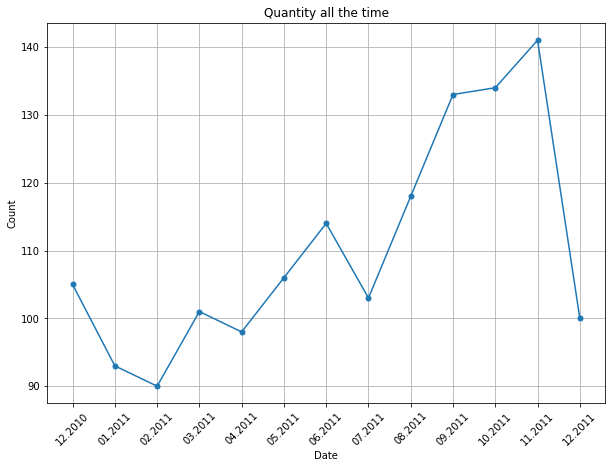

In [30]:
df = pd.DataFrame(month_order.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False,
    marker = 'o',
    ms = 5
)

df.set_xlabel('Date')
df.set_ylabel('Count')
df.set_title('Quantity all the time')

plt.xticks(
    range(len(month_order.index)), 
    [x.strftime('%m.%Y') for x in month_order.index], 
    rotation=45
)

plt.show()

In [31]:
Invoice_Date = on.loc[on['InvoiceDate'] >= '2011-12-01', 'InvoiceDate']

In [32]:
print('min date: %s \nmax date: %s' % (Invoice_Date.min(), Invoice_Date.max()))

min date: 2011-12-01 08:33:00 
max date: 2011-12-09 12:50:00


In [33]:
on.loc[on['InvoiceDate'] < '2011-12-01'].shape

(380620, 9)

In [34]:
on.shape

(397924, 9)

In [35]:
on = on.loc[on['InvoiceDate'] < '2011-12-01']

**The country which have the higher sales**

In [36]:
on.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [37]:
on['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [38]:
on['Sales'] = on['Quantity'] * on['UnitPrice']

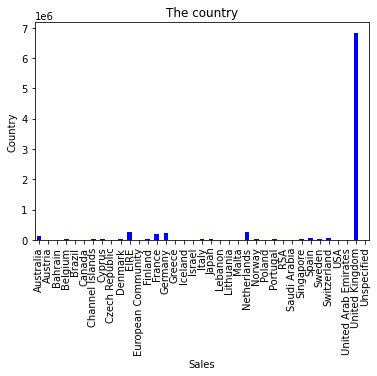

In [39]:
on.groupby('Country')['Sales'].sum().plot(kind='bar', color='blue')

plt.xlabel('Sales')
plt.ylabel('Country')
plt.title('The country')

plt.show()

In [40]:
county = on.groupby(['Country']).agg({'Sales': 'sum'})

In [41]:
county

,Sales
Country,
Australia,138521.310
Austria,9515.480
Bahrain,548.400
Belgium,39778.610
Brazil,1143.600
Canada,3666.380
Channel Islands,20252.040
Cyprus,13590.380
Czech Republic,826.740


**Customer Who Buys many Items**

In [42]:
on.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [43]:
customer = on.groupby(['CustomerID', 'Country']).agg({'UnitPrice': 'max', 'Quantity': 'max', 'Sales': 'sum'})

In [44]:
customer.head()

,,UnitPrice,Quantity,Sales
CustomerID,Country,,,
12346.0,United Kingdom,1.04,74215,77183.60
12347.0,Iceland,12.75,240,4085.18
12348.0,Finland,40.00,144,1797.24
12349.0,Italy,300.00,36,1757.55
12350.0,Norway,40.00,24,334.40


**Time Series Revenue**

In [45]:
revenue = on.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [46]:
revenue

InvoiceDate
2010-12-31     572713.890
2011-01-31     569445.040
2011-02-28     447137.350
2011-03-31     595500.760
2011-04-30     469200.361
2011-05-31     678594.560
2011-06-30     661213.690
2011-07-31     600091.011
2011-08-31     645343.900
2011-09-30     952838.382
2011-10-31    1039318.790
2011-11-30    1161817.380
Freq: M, Name: Sales, dtype: float64

**Popular Items All the Time**

In [47]:
on.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [48]:
item = pd.DataFrame(on.set_index('Month_year').groupby(['CustomerID', 'Description'])['Quantity'].sum())

In [49]:
item

Quantity
CustomerID Description                                
12346.0    MEDIUM CERAMIC TOP STORAGE JAR        74215
12347.0    3D DOG PICTURE PLAYING CARDS            126
           3D SHEET OF CAT STICKERS                 12
           3D SHEET OF DOG STICKERS                 12
           60 TEATIME FAIRY CAKE CASES              72
...                                                ...
18287.0    STAR T-LIGHT HOLDER WILLIE WINKIE        12
           STRAWBERRY BATH SPONGE                   30
           STRAWBERRY CERAMIC TRINKET BOX           12
           SWISS CHALET TREE DECORATION             48
           TREE T-LIGHT HOLDER WILLIE WINKIE        12

[259712 rows x 1 columns]

**Make Rank to Popular Items**

In [50]:
rank = item.sort_values(by='Quantity', ascending=False)

In [51]:
rank

,,Quantity
CustomerID,Description,
12346.0,MEDIUM CERAMIC TOP STORAGE JAR,74215
13256.0,ASSTD DESIGN 3D PAPER STICKERS,12540
16422.0,BROCADE RING PURSE,10080
16333.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10080
16308.0,SMALL CHINESE STYLE SCISSOR,8000
...,...,...
15993.0,TEA COSY RED STRIPE,1
15052.0,STRAWBERRY DREAM CHILDS UMBRELLA,1
17591.0,CHILLI LIGHTS,1


In [55]:
on.to_csv('online_retail.csv')
from google.colab import files
files.download('online_retail.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>